In [1]:
import pandas as pd
import numpy as np 


df=pd.read_csv("diabetes.csv")

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
## There are no missing values

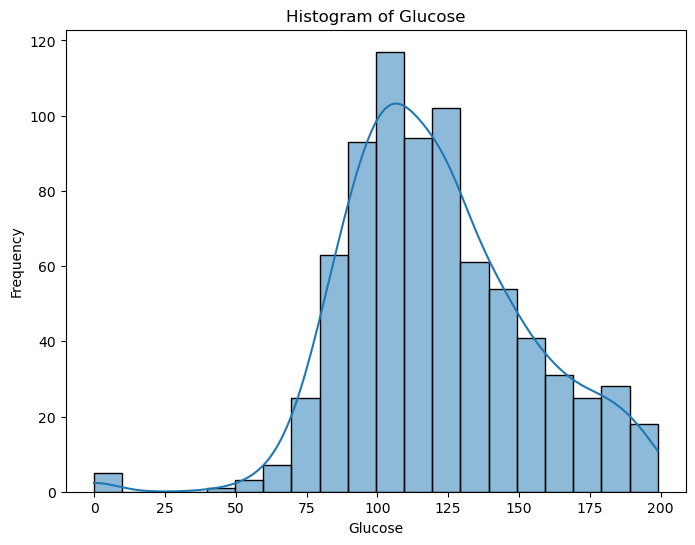

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of a numerical column
plt.figure(figsize=(8, 6))
sns.histplot(df['Glucose'], bins=20, kde=True)
plt.title('Histogram of Glucose')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.show()


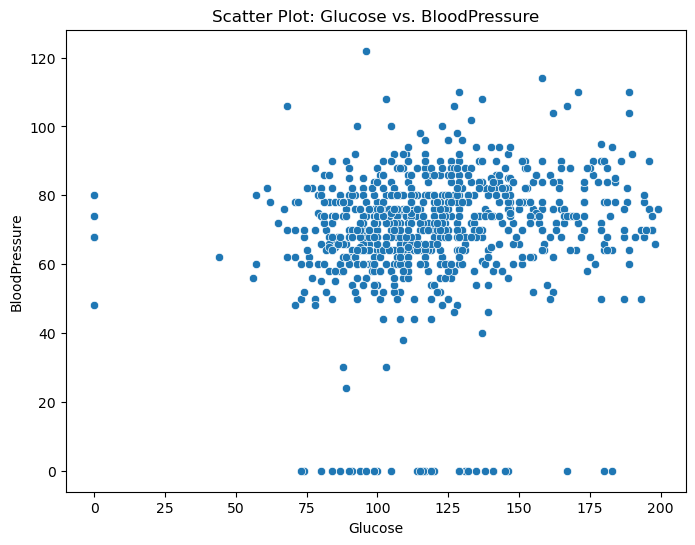

In [7]:
# Scatter plot of two numerical columns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='BloodPressure', data=df)
plt.title('Scatter Plot: Glucose vs. BloodPressure')
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.show()

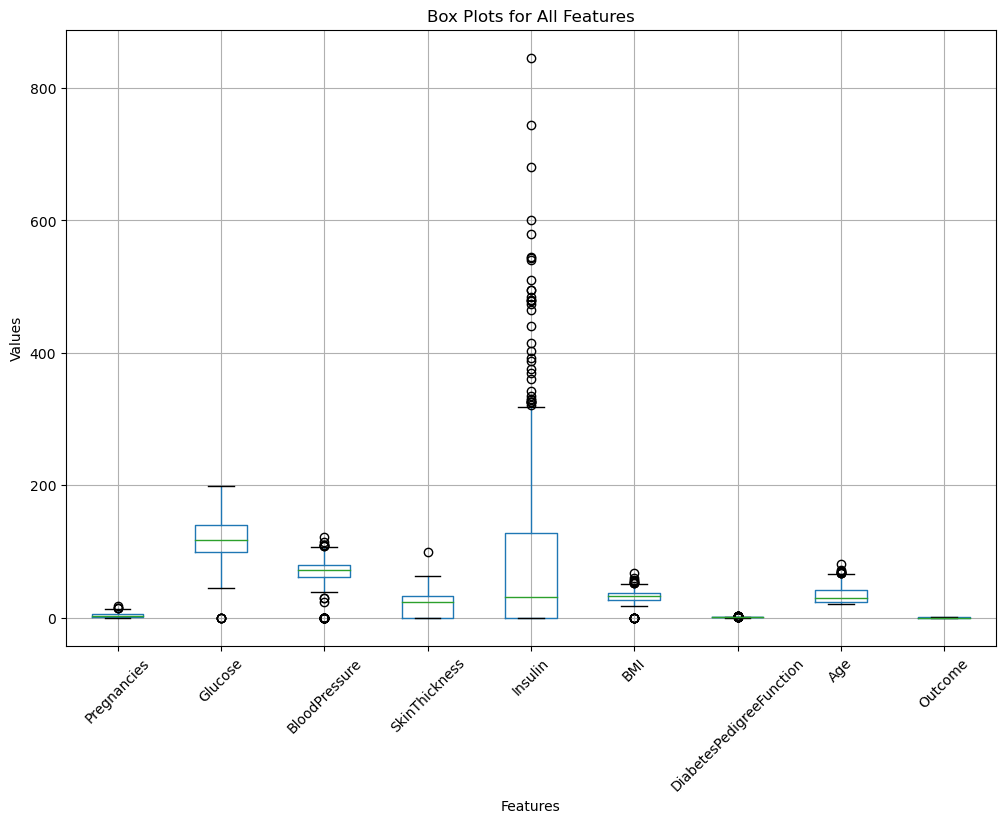

In [8]:
plt.figure(figsize=(12, 8))  # Set the size of the figure
df.boxplot()
plt.title('Box Plots for All Features')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()

**Insulin has too many outliers in the dataset as per boxplot**

In [10]:
## Train test split 

from sklearn.model_selection import train_test_split

# Specify the feature columns (X) and the target column (y)
X = df.drop('Outcome', axis=1)  
y = df['Outcome']  

In [11]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


In [12]:
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define the decision tree classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Define the hyperparameters to search over in cross-validation
param_grid = {
    'max_depth': [None, 5, 10, 15],            # Varying maximum depth
    'min_samples_split': [2, 5, 10, 15, 20]    # Varying minimum samples required to split
}

grid_search = GridSearchCV(dt_classifier, param_grid, cv=5)



In [13]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_split': [2, 5, 10, 15, 20]})

In [14]:
# Print the best hyperparameters found during cross-validation
print("Best Hyperparameters:")
print(grid_search.best_params_)

Best Hyperparameters:
{'max_depth': 5, 'min_samples_split': 20}


In [15]:
# Get the best decision tree model
best_dt_model = grid_search.best_estimator_

In [16]:
# Make predictions on the test set using the best model
y_pred = best_dt_model.predict(X_test)

In [17]:
# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

Test Set Accuracy: 0.7857142857142857


In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score


# Calculate precision on the test set
precision = precision_score(y_test, y_pred)
print("Test Set precision:", precision)

# Calculate Recall on the test set
recall = recall_score(y_test, y_pred)
print("Test Set recall:", recall)

# Calculate F1 Score on the test set
f1 = f1_score(y_test, y_pred)
print("Test Set f1:", f1)

Test Set precision: 0.7037037037037037
Test Set recall: 0.6909090909090909
Test Set f1: 0.6972477064220184


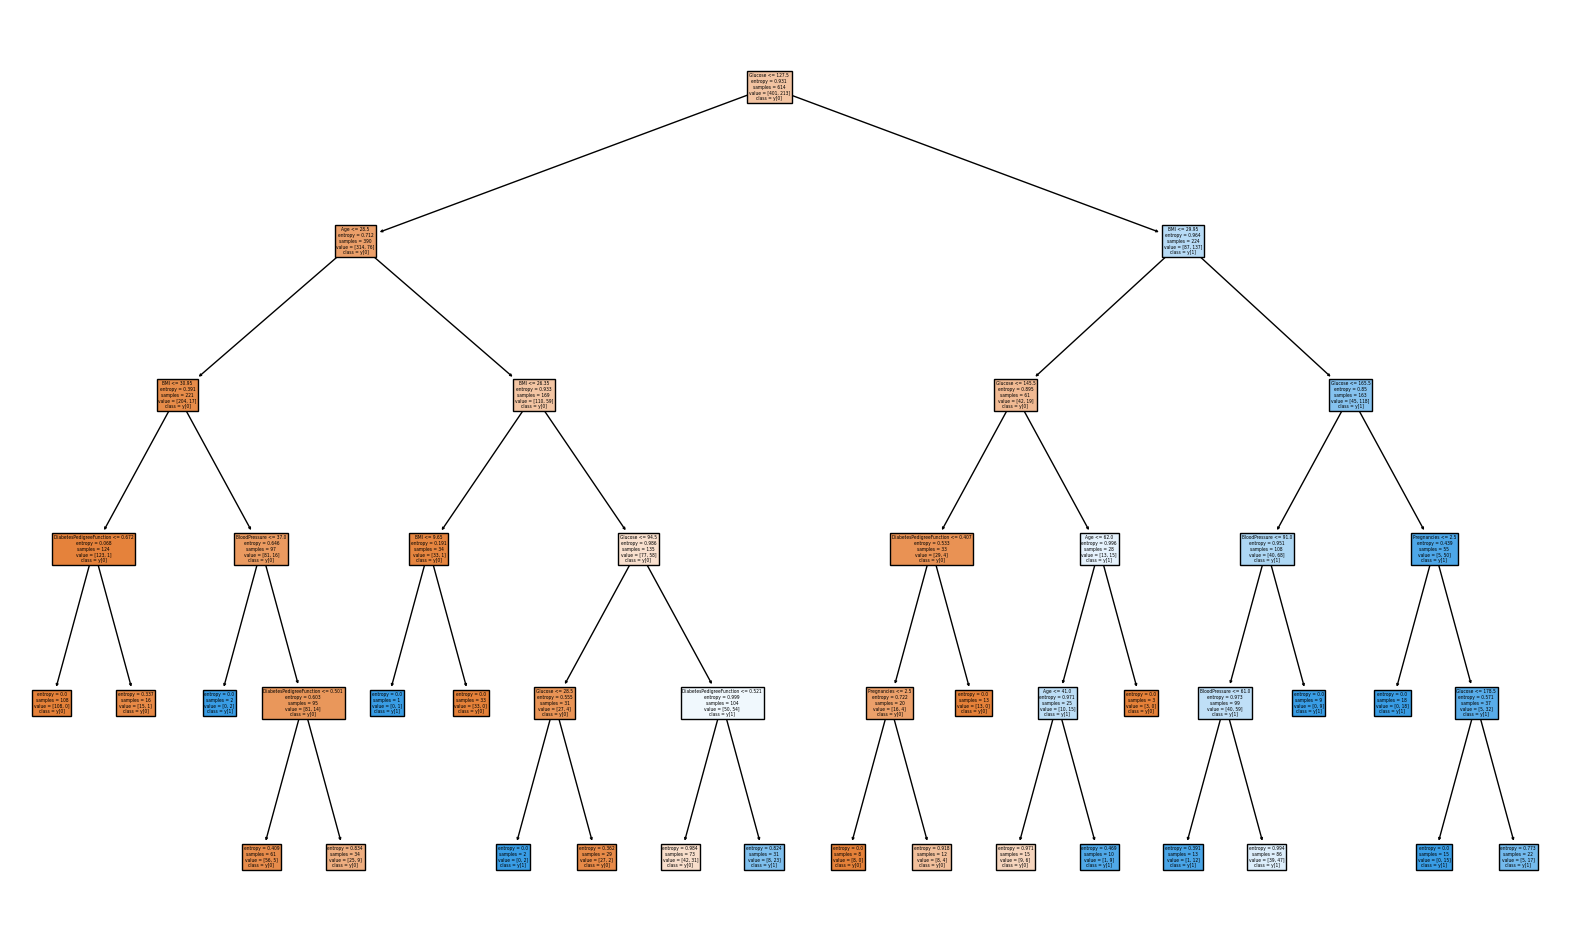

In [28]:
from sklearn.tree import plot_tree


# Display the decision tree
plt.figure(figsize=(20, 12))
plot_tree(best_dt_model, feature_names=X.columns, class_names=True, filled=True)
plt.show()

**Root node used is Glucose <= 127.5** As Glucose is key factor in deciding diabetic

**As Max depth is set to 5; decision tree is pruned at 5th level**

In [29]:
print(X_test)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
668            6       98             58             33      190  34.0   
324            2      112             75             32        0  35.7   
624            2      108             64              0        0  30.8   
690            8      107             80              0        0  24.6   
473            7      136             90              0        0  29.9   
..           ...      ...            ...            ...      ...   ...   
355            9      165             88              0        0  30.4   
534            1       77             56             30       56  33.3   
344            8       95             72              0        0  36.8   
296            2      146             70             38      360  28.0   
462            8       74             70             40       49  35.3   

     DiabetesPedigreeFunction  Age  
668                     0.430   43  
324                     0.148   21  


In [35]:
additional_data = np.array([[1, 200, 80, 40, 50, 25, 0.5, 50]])
additional_data
additonal_data_predict = best_dt_model.predict(additional_data)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [36]:
additonal_data_predict

array([1])

As per perdiction, person is Diabetic

In [38]:
additional_data1 = np.array([[1, 80, 80, 40, 50, 25, 0.5, 50]])

additonal_data_predict1 = best_dt_model.predict(additional_data1)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [39]:
additonal_data_predict1

array([0])

As per perdiction, person is non- Diabetic
Just Glucose feature was reduced. Hence it can be concluded that Glucose is a key parameter in deciding if person is diabetic or non diabetic